## ISLP Chapter 5 - Resampling

### Applied exercise 9

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from statistics import stdev
from math import sqrt

In [2]:
# import relevant data visualisaton packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load dataset
# url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Boston.csv"
url = "../../Data/Boston.csv"
Boston = pd.read_csv(url, index_col = 'SlNo')

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 9.a. Estimate of the population mean of medv

In [5]:
mu_hat = round(Boston.medv.mean(), 2)
mu_hat

22.53

In [6]:
sigma_hat = round(sqrt(Boston.medv.var()/(len(Boston.medv))), 4)
sigma_hat

0.4089

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/3239549952.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston.medv)


<Axes: xlabel='medv', ylabel='Density'>

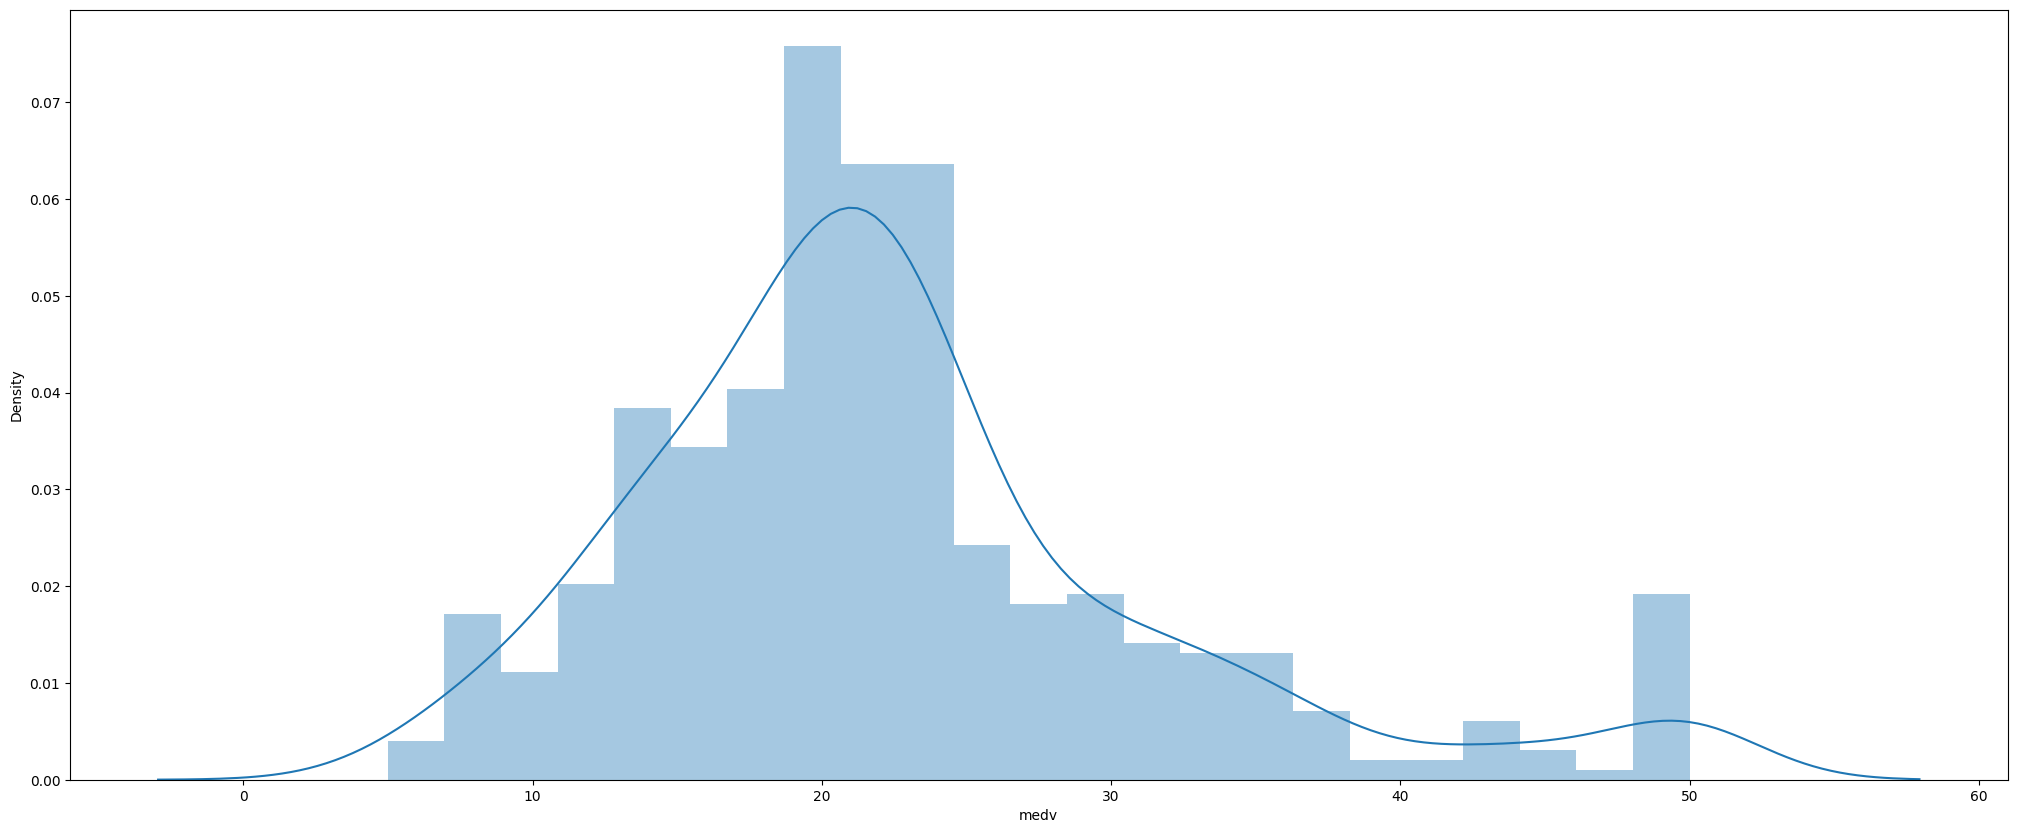

In [7]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
sns.distplot(Boston.medv)

### 9.c. Estimating the standard error of mu-hat using the bootstrap

In [8]:
def meanfn(data, index):
    X = data.medv.iloc[index]
    return round(X.mean(), 2)

In [9]:
n = len(Boston.medv)
n

506

In [10]:
idx = list(range(n))

In [11]:
true_mean = meanfn(Boston, idx)
true_mean

22.53

In [12]:
from sklearn.utils import resample

In [13]:
estimate_mean = pd.DataFrame()
for i in range(n): # this is equivalent to constructing a new bootstrap data set and recomputing alpha_hat based on the new data set and generating 1,000 bootstrap estimates 
    bootstrap_estimate = meanfn(Boston, resample(idx, replace=True))
    estimate_mean = estimate_mean.append([bootstrap_estimate])    

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/1557057183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_mean = estimate_mean.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/1557057183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_mean = estimate_mean.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/1557057183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_mean = estimate_mean.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/1557057183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [14]:
estimate_mean.reset_index(drop=True, inplace=True)
estimate_mean.columns = ['Mean Estimate']
estimate_mean.head()

,Mean Estimate
0,22.29
1,22.55
2,22.02
3,22.58
4,23.14


In [15]:
bootstrap_mean = round(estimate_mean['Mean Estimate'].mean(), 2)
bootstrap_mean

22.55

In [16]:
len(estimate_mean)

506

In [17]:
std_err = round(np.sqrt(np.sum(pow(estimate_mean - (np.sum(estimate_mean) / 506), 2))/505), 4) # check formula for standard error in page 189 of ISLR

In [18]:
std_err

Mean Estimate    0.3986
dtype: float64

**The bootstrap estimate of the mean is 22.55 with a standard error of 0.3986. This is not too dissimilar from the 
true (population) mean and standard error of 22.53 and 0.4089 respectively.**

### 9.e. 95% confidence interval for the bootstrap estimate of the mean

**Bootstrap estimates**

In [19]:
conf_int_BS = [[round(bootstrap_mean - 2 * std_err, 4), round(bootstrap_mean + 2 * std_err, 4)]]
conf_int_BS

[[Mean Estimate    21.7528
  dtype: float64,
  Mean Estimate    23.3472
  dtype: float64]]

**Population estimates**

In [20]:
conf_int_pop = [[round(mu_hat - 2 * sigma_hat, 4), round(mu_hat + 2 * sigma_hat, 4)]]
conf_int_pop

[[21.7122, 23.3478]]

**The C.I. of the bootstrap estimates are narrower than the C.I. of the population estimates.**

### 9.e. Estimate of the median value of 'medv'

In [21]:
mu_med = Boston.medv.median()
mu_med

21.2

### 9.f. Estimate of the standard error of the median value of 'medv' using bootstrap

In [22]:
def medfn(data, index):
    X = data.medv.iloc[index]
    return round(X.median(), 2)

In [23]:
n = len(Boston.medv)
n

506

In [24]:
idx = list(range(n))

In [25]:
true_med = medfn(Boston, idx)
true_med

21.2

In [26]:
from sklearn.utils import resample

In [27]:
estimate_med = pd.DataFrame()
for i in range(n): # this is equivalent to constructing a new bootstrap data set and recomputing alpha_hat based on the new data set and generating 1,000 bootstrap estimates 
    bootstrap_estimate = medfn(Boston, resample(idx, replace=True))
    estimate_med = estimate_med.append([bootstrap_estimate])    

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/4167573378.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_med = estimate_med.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/4167573378.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_med = estimate_med.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/4167573378.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_med = estimate_med.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/4167573378.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [28]:
estimate_med.reset_index(drop=True, inplace=True)
estimate_med.columns = ['Median Estimate']
estimate_med.head()

,Median Estimate
0,21.7
1,21.2
2,20.8
3,21.9
4,21.2


In [29]:
std_err = round(np.sqrt(np.sum(pow(estimate_med - (np.sum(estimate_med) / 506), 2))/505), 4) # check formula for standard error in page 189 of ISLR

In [30]:
std_err

Median Estimate    0.3773
dtype: float64

**Therefore, the median and standard error using bootstrap are 21.2 and 0.3773 respectively. The standard error is small
relative to the the median.**

### 9.g. Estimate of the tenth percentile of 'medv'

In [31]:
mu_01 = Boston.medv.quantile(0.1)
mu_01

12.75

### 9.h. Estimate of the standard error of the tenth percentile of 'medv' using bootstrap

In [32]:
def perc01fn(data, index):
    X = data.medv.iloc[index]
    return round(X.quantile(0.1), 2)

In [33]:
n = len(Boston.medv)
n

506

In [34]:
idx = list(range(n))

In [35]:
true_perc01 = perc01fn(Boston, idx)
true_perc01

12.75

In [36]:
from sklearn.utils import resample

In [37]:
estimate_perc01 = pd.DataFrame()
for i in range(n): # this is equivalent to constructing a new bootstrap data set and recomputing alpha_hat based on the new data set and generating 1,000 bootstrap estimates 
    bootstrap_estimate = perc01fn(Boston, resample(idx, replace=True))
    estimate_perc01 = estimate_perc01.append([bootstrap_estimate])    

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/885781194.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_perc01 = estimate_perc01.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/885781194.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_perc01 = estimate_perc01.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/885781194.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  estimate_perc01 = estimate_perc01.append([bootstrap_estimate])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_62914/885781194.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [38]:
estimate_perc01.reset_index(drop=True, inplace=True)
estimate_perc01.columns = ['10th-percentile Estimate']
estimate_perc01.head()

,10th-percentile Estimate
0,12.55
1,11.85
2,13.10
3,12.70
4,13.20


In [39]:
std_err = round(np.sqrt(np.sum(pow(estimate_perc01 - (np.sum(estimate_perc01) / 506), 2))/505), 4) # check formula for standard error in page 189 of ISLR

In [40]:
std_err

10th-percentile Estimate    0.4865
dtype: float64

**Therefore, the median and standard error using bootstrap are 12.75 and 0.4865 respectively. The standard error is small
relative to the the median.**